# Stock Price Prediction Using LSTM

The Stock Price Prediction Using LSTM and Random Forest project focuses on predicting the future stock prices of Apple Inc. (AAPL) using historical data obtained from Yahoo Finance. The project involves the following key steps:

Data Loading: Historical stock prices are fetched using the yfinance library from Yahoo Finance, specifically focusing on the "Close" prices of the Apple stock from 2010 to 2023.

Data Preprocessing: The data is preprocessed by scaling it between 0 and 1 using MinMaxScaler. The dataset is then split into training and testing sets, with 80% used for training the model and 20% for testing. A sliding window approach with a 60-day lookback is used to create input sequences for the LSTM model.

LSTM Model: A Long Short-Term Memory (LSTM) neural network is built using Keras. The model consists of multiple LSTM layers followed by Dropout layers to prevent overfitting. The LSTM model is trained using the Adam optimizer, and early stopping is applied to avoid unnecessary training.

Random Forest Model: As a baseline comparison, a Random Forest regression model is trained using the same data. The LSTM model’s performance is compared with Random Forest predictions.

Model Evaluation: Both models are evaluated using the Root Mean Squared Error (RMSE). Visual comparisons are made between the predicted and actual stock prices. The LSTM model is shown to outperform the Random Forest model for stock price prediction.

Future Price Prediction: The model is used to predict future stock prices based on the last 60 days of data. A visualization of the future prediction is provided, including the actual price, the LSTM predicted price, and the Random Forest predicted price.

Comparison and Visualization: Both models' predictions (LSTM and Random Forest) are compared and plotted against the actual stock prices. The results show that the LSTM model captures stock price trends better than Random Forest.


## Data Loading

We will load stock price data from Yahoo Finance using the `yfinance` library. For this example, we will use the Apple Inc. (AAPL) stock symbol.

In [13]:
!pip install yfinance

## Data Preprocessing

The data will be preprocessed by filtering the 'Close' price, scaling the data, and creating datasets suitable for training and testing the LSTM model.


## Model Building

We will build an LSTM model with tuned hyperparameters. The model will be trained to predict future stock prices based on historical data.


[*********************100%***********************]  1 of 1 completed

Epoch 1/15



/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0225
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0015
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0013
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 8.7614e-04
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 8.2137e-04
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 8.2866e-04
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 7.9170e-04
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 7.5218e-04
Epoch 9/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 6.4334e-04
Epoch 10/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 6.5098e-04
Epoch 11/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 7.0077e-04
Epoch 12/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 6.1675e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Tuned Model RMSE: 18.41844392763679


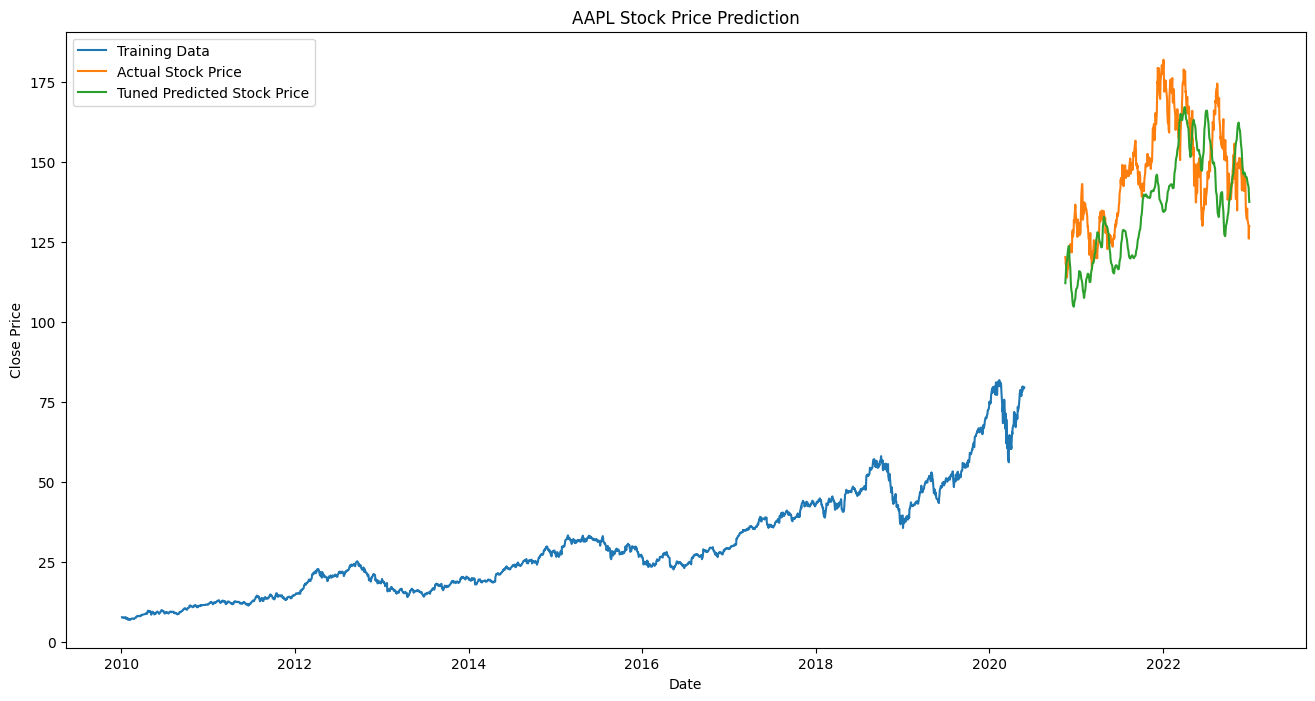

Tuned Model RMSE: 18.41844392763679


In [14]:
# !pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load stock data from Yahoo Finance
stock_symbol = 'AAPL'  # You can replace this with any stock symbol (e.g., 'GOOGL', 'TSLA', etc.)
df = yf.download(stock_symbol, start='2010-01-01', end='2023-01-01')

# Step 2: Filter only the 'Close' price column
data = df.filter(['Close'])

# Convert to numpy array
dataset = data.values

# Step 3: Split the dataset into training and testing data (80% training, 20% testing)
train_size = int(len(dataset) * 0.8)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# Step 4: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

# Function to create training dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Step 5: Create training dataset
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

# Reshape X_train for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Step 6: Build and tune the LSTM model
model_tuned = Sequential()
model_tuned.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_tuned.add(Dropout(0.3))
model_tuned.add(LSTM(100, return_sequences=False))
model_tuned.add(Dropout(0.3))
model_tuned.add(Dense(50))
model_tuned.add(Dense(1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model_tuned.compile(optimizer=optimizer, loss='mean_squared_error')

# Adding early stopping
early_stopping = EarlyStopping(monitor='loss', patience=3)

# Train the model with more epochs
model_tuned.fit(X_train, y_train, batch_size=32, epochs=15, callbacks=[early_stopping])

# Step 7: Prepare test dataset
test_scaled = scaler.transform(test_data)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape X_test for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 8: Make predictions
predictions_tuned = model_tuned.predict(X_test)
predictions_tuned = scaler.inverse_transform(predictions_tuned)

# Assuming you have already trained your model and made predictions

# Step 9: Visualize the results
# Correcting the length of predictions to match the validation dataset
# Ensure 'Tuned Predictions' has the same length as 'Close' in the valid set
# Ensure 'Tuned Predictions' has the same length as the remaining 'valid' dataset after time_step
valid['Tuned Predictions'] = np.nan

# Adjust the length of 'predictions_tuned' to match the 'valid' DataFrame
valid.iloc[time_step:time_step + len(predictions_tuned), valid.columns.get_loc('Tuned Predictions')] = predictions_tuned[:len(valid) - time_step]

# Drop NaN values before evaluation
valid.dropna(subset=['Tuned Predictions'], inplace=True)

# Evaluate the tuned model
rmse_tuned = np.sqrt(mean_squared_error(valid['Close'], valid['Tuned Predictions']))
print(f'Tuned Model RMSE: {rmse_tuned}')

# Visualize the results
plt.figure(figsize=(16,8))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data[:train_size]['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Stock Price')
plt.plot(valid['Tuned Predictions'], label='Tuned Predicted Stock Price')
plt.legend()
plt.show()

# Step 10: Evaluate tuned model
rmse_tuned = np.sqrt(mean_squared_error(valid['Close'], valid['Tuned Predictions'].dropna()))
print(f'Tuned Model RMSE: {rmse_tuned}')

## Model Evaluation

The model's performance will be evaluated using the Root Mean Squared Error (RMSE) metric. We will visualize the predicted and actual stock prices to assess the model's accuracy.


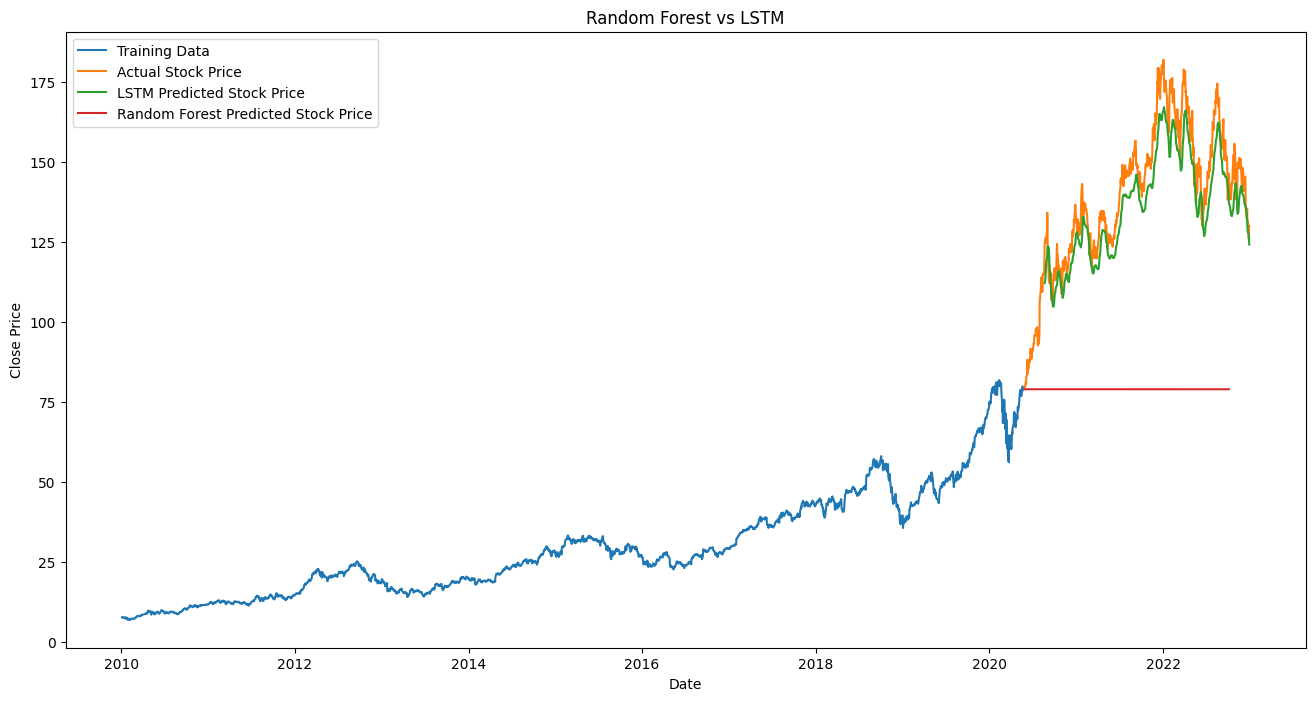

Random Forest RMSE: 67.26718978037478


In [19]:
# Comparison with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming df contains the stock data and the LSTM predictions have been stored correctly
train_size = int(len(df) * 0.8)
train = df[:train_size]
valid = df[train_size:].copy()

# Assuming 'predictions_tuned' contains LSTM predictions
# Add 'Tuned Predictions' to the valid DataFrame
valid.loc[valid.index[time_step:], 'Tuned Predictions'] = predictions_tuned

# Flatten training data for Random Forest
X_train_rf = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test_rf = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_rf, y_train)

# Make predictions with Random Forest
rf_predictions = rf_model.predict(X_test_rf)
rf_predictions = np.reshape(rf_predictions, (-1, 1))
rf_predictions = scaler.inverse_transform(rf_predictions)

# Adjust the length of rf_predictions to match the valid DataFrame
adjusted_length = min(len(rf_predictions), len(valid))

# Insert Random Forest predictions into the valid DataFrame using .loc[]
valid.loc[valid.index[:adjusted_length], 'RF Predictions'] = rf_predictions[:adjusted_length]

# Plot Random Forest predictions vs actual stock price
plt.figure(figsize=(16, 8))
plt.title('Random Forest vs LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Stock Price')
plt.plot(valid['Tuned Predictions'], label='LSTM Predicted Stock Price')
plt.plot(valid['RF Predictions'], label='Random Forest Predicted Stock Price')
plt.legend()
plt.show()

# Evaluate Random Forest model
rmse_rf = np.sqrt(mean_squared_error(valid.dropna()['Close'], valid.dropna()['RF Predictions']))
print(f'Random Forest RMSE: {rmse_rf}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Stock Price for next day: 123.57633972167969


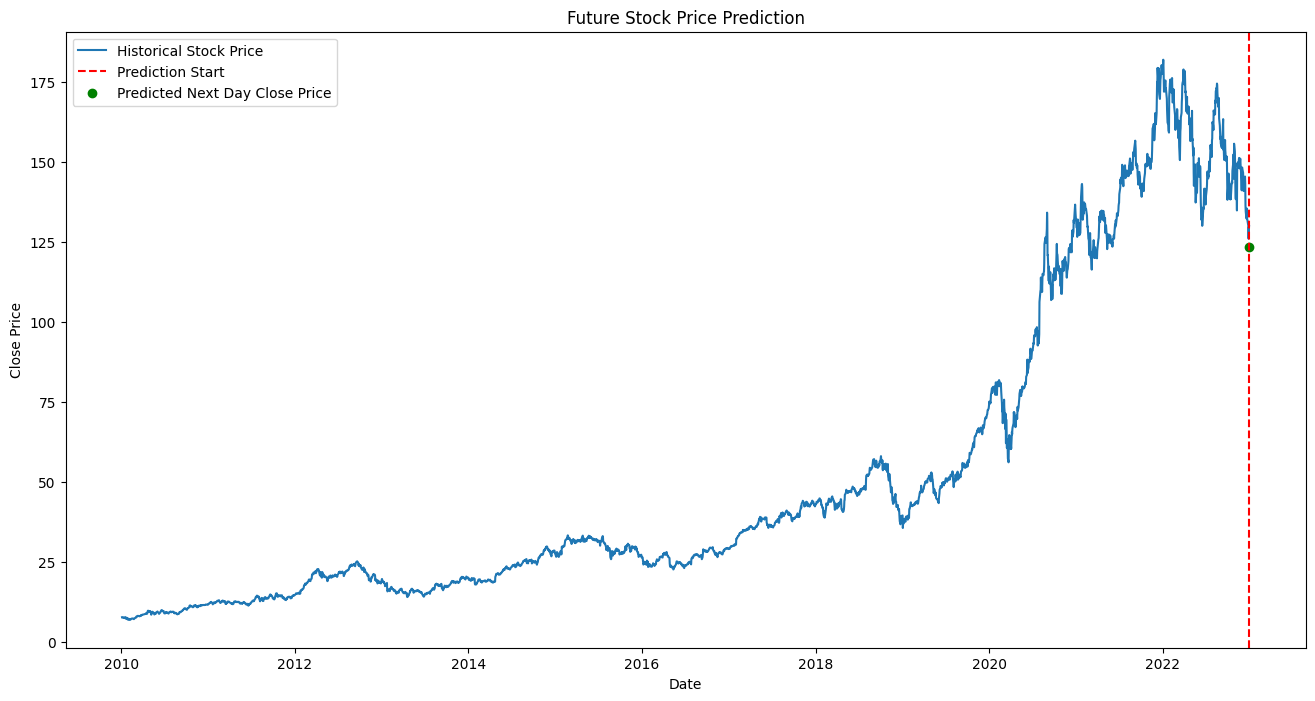

In [18]:
# Predicting Future Stock Prices
# Get the last 'time_step' data points from the dataset
last_60_days = data[-time_step:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Reshape to fit LSTM model input
X_future = []
X_future.append(last_60_days_scaled)
X_future = np.array(X_future)
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Predict the next closing price
future_prediction = model_tuned.predict(X_future)
future_prediction = scaler.inverse_transform(future_prediction)

# Display the predicted future price
print(f'Predicted Stock Price for next day: {future_prediction[0][0]}')

# Visualize the historical and future prediction
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Historical Stock Price')
plt.axvline(x=data.index[-1], color='red', linestyle='--', label='Prediction Start')
plt.scatter(data.index[-1] + pd.Timedelta(days=1), future_prediction[0], color='green', label='Predicted Next Day Close Price')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Conclusion

The notebook demonstrates the entire process of predicting stock prices using an LSTM model. The performance is evaluated, and the results are visualized for better understanding.
